#                                  Indian Liver Patient Dataset

# Importing Libraries and Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report

In [4]:
liver_data=pd.read_csv(r'C:\Users\umade\Downloads\indian_liver_patient.csv' ,header=0)
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
liver_data.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [7]:
liver_data.shape

(583, 11)

In [8]:
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


# Exploratory Data Analysis

In [9]:
#Descriptive Statistics
liver_data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [10]:
liver_data.describe(include=object)

,Gender
count,583
unique,2
top,Male
freq,441


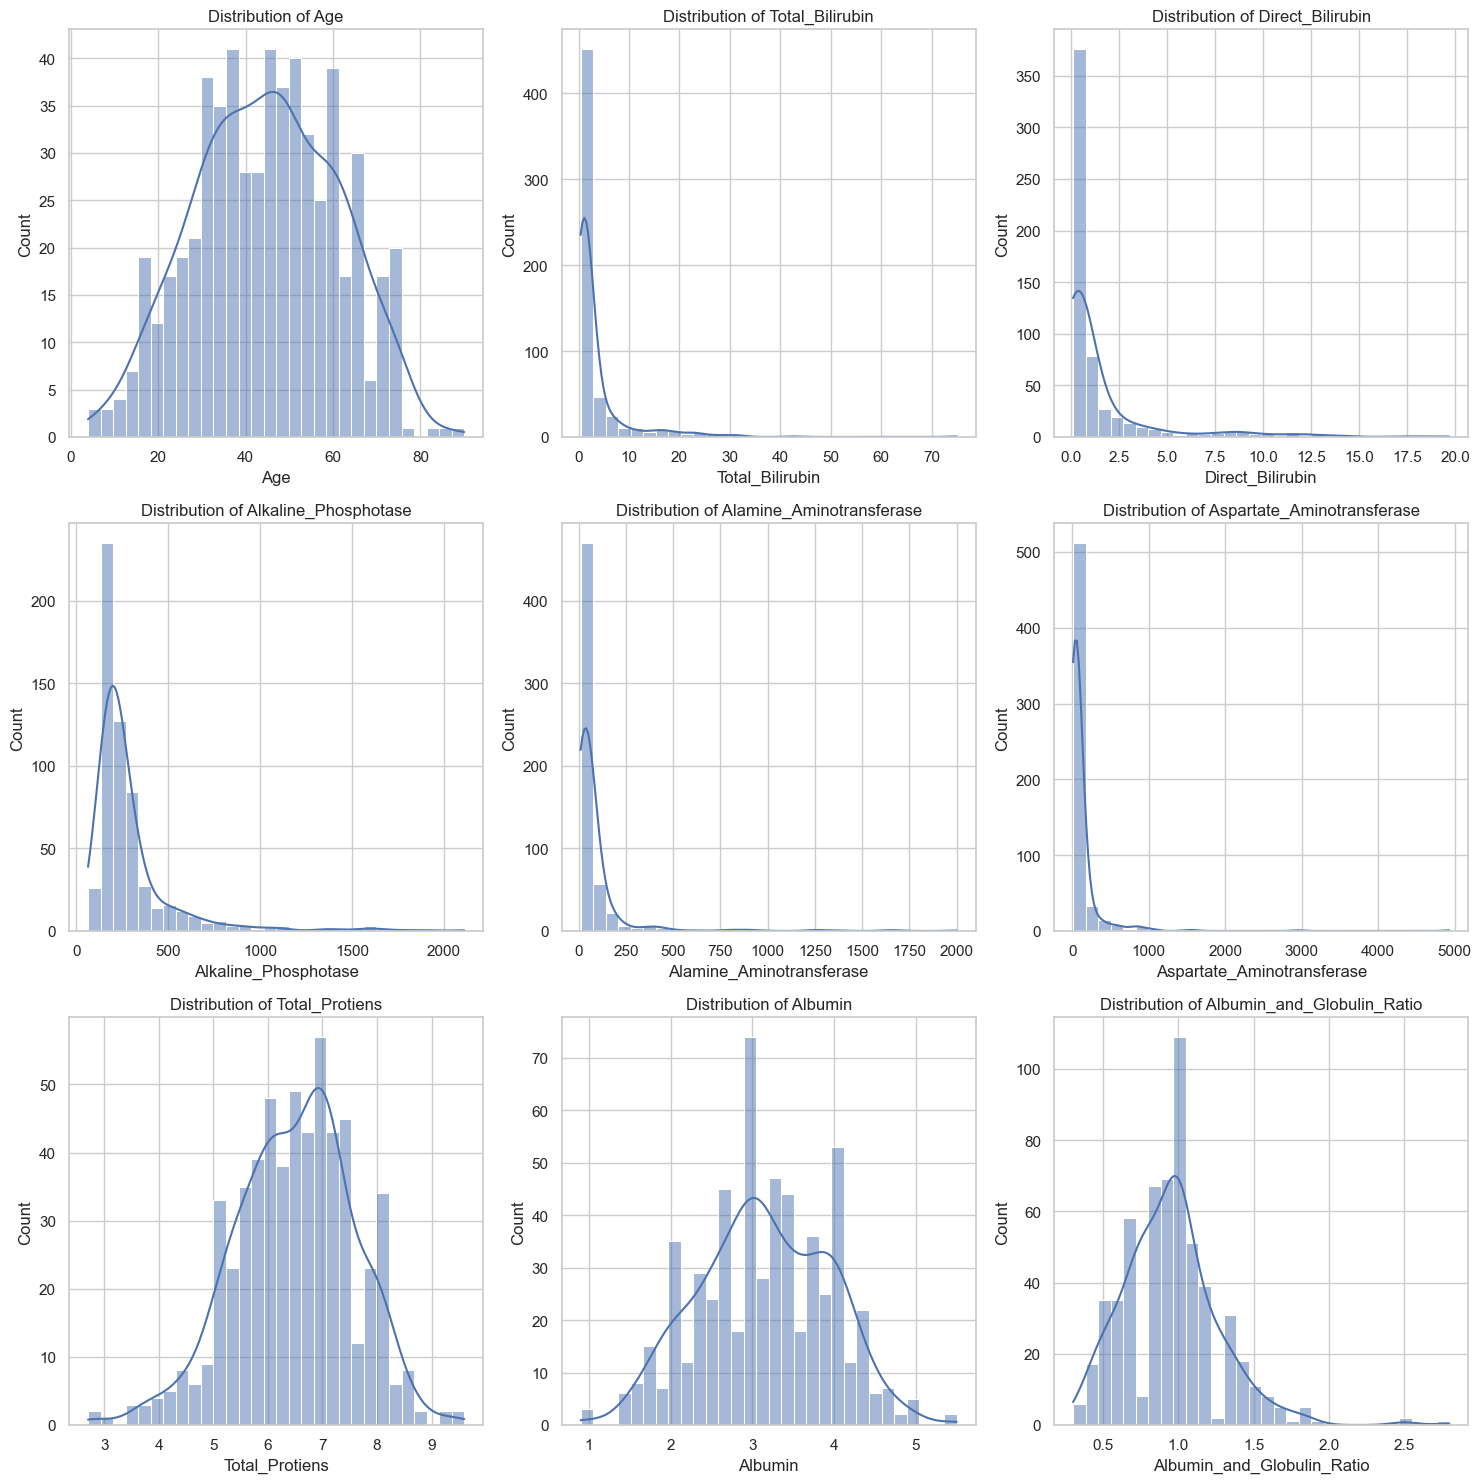

In [11]:
#Visualizing Distributions to spot skewness or outliers
# Set up for distribution plots
sns.set(style="whitegrid")
numerical_features = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 
                      'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 
                      'Aspartate_Aminotransferase', 'Total_Protiens', 
                      'Albumin', 'Albumin_and_Globulin_Ratio']

# Plot distributions
plt.figure(figsize=(15, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(liver_data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


# Data Cleaning

In [12]:
#Handling Missing Values
# Checking missing values
print("Missing values:\n", liver_data.isnull().sum())

# Fill missing values in 'Albumin_and_Globulin_Ratio' with the column mean
liver_data['Albumin_and_Globulin_Ratio'].fillna(liver_data['Albumin_and_Globulin_Ratio'].mean(), inplace=True)


Missing values:
 Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


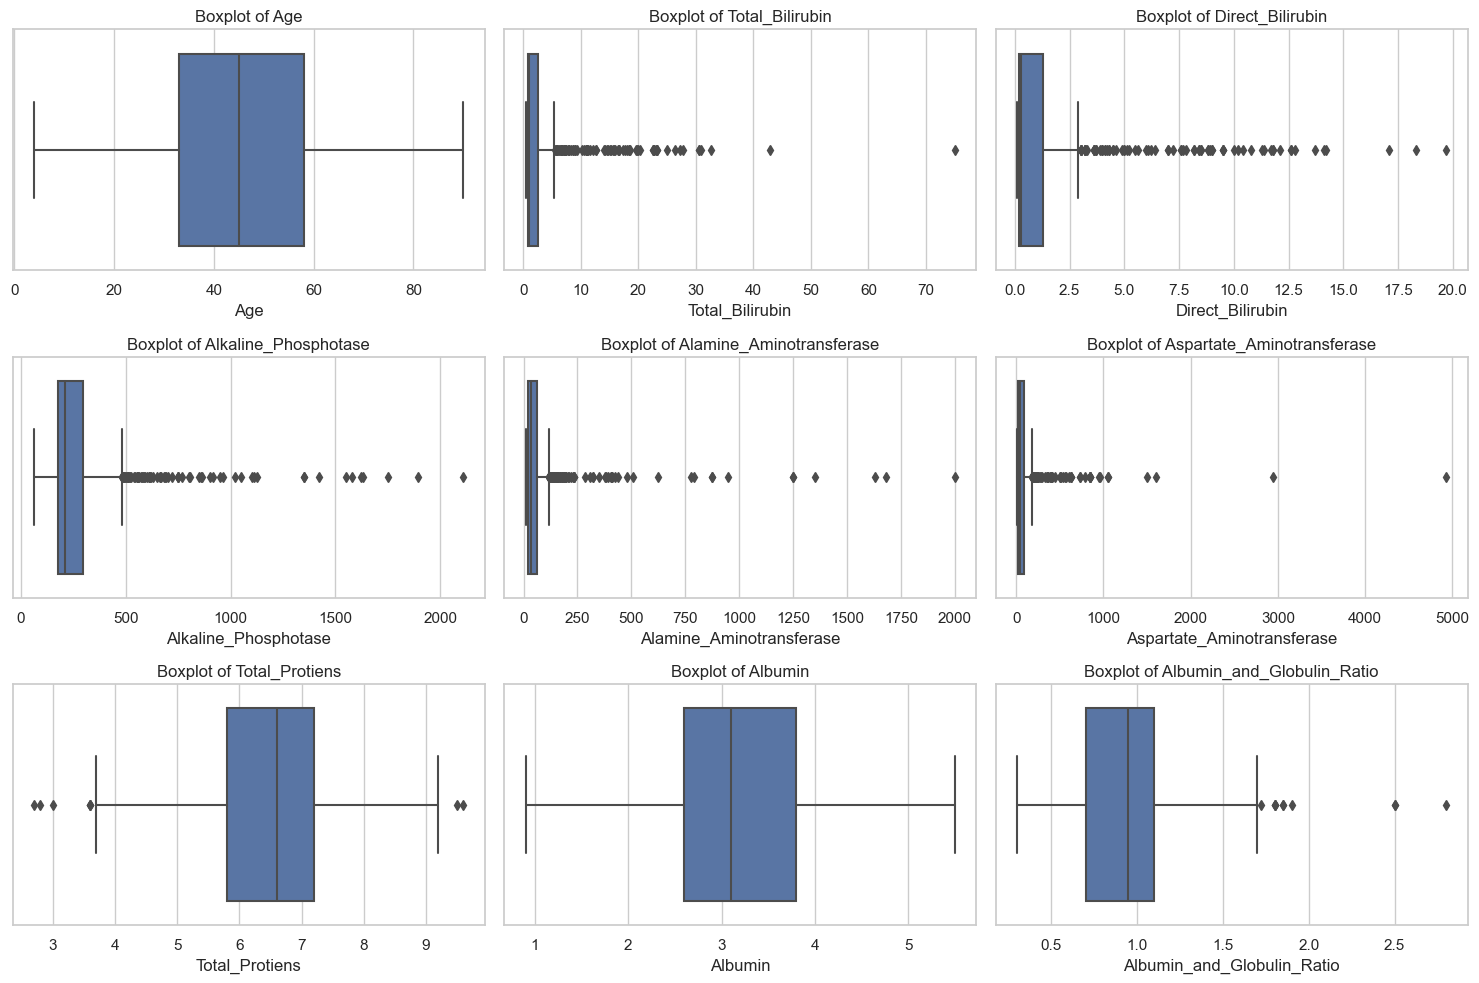

In [13]:
#Detecting Outliers
# Boxplots to visually inspect outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=liver_data[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


In [14]:
# Define a function to cap outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap values outside bounds
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply outlier treatment to relevant numerical columns
numerical_features = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 
                      'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 
                      'Aspartate_Aminotransferase', 'Total_Protiens', 
                      'Albumin', 'Albumin_and_Globulin_Ratio']

for feature in numerical_features:
    cap_outliers(liver_data, feature)


# Data Preprocessing

In [15]:
#Encoding Categorical variables
# Convert 'Gender' to numeric values
liver_data['Gender'] = liver_data['Gender'].map({'Male': 1, 'Female': 0})


In [16]:
#Feature Scaling
#Scale features to improve model performance.
from sklearn.preprocessing import StandardScaler
features_to_scale = numerical_features
scaler = StandardScaler()
liver_data[features_to_scale] = scaler.fit_transform(liver_data[features_to_scale])


# Splitting the dataset

In [17]:
#Split the data into training and testing sets.
from sklearn.model_selection import train_test_split

# Define features and target variable
X = liver_data.drop(columns='Dataset')
y = liver_data['Dataset']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Training and Evaluation

# 1.Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.7521367521367521
              precision    recall  f1-score   support

           1       0.79      0.91      0.84        87
           2       0.53      0.30      0.38        30

    accuracy                           0.75       117
   macro avg       0.66      0.60      0.61       117
weighted avg       0.72      0.75      0.73       117



# 2.Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7008547008547008
              precision    recall  f1-score   support

           1       0.82      0.77      0.79        87
           2       0.43      0.50      0.46        30

    accuracy                           0.70       117
   macro avg       0.62      0.64      0.63       117
weighted avg       0.72      0.70      0.71       117



# 3.Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7606837606837606
              precision    recall  f1-score   support

           1       0.81      0.89      0.85        87
           2       0.55      0.40      0.46        30

    accuracy                           0.76       117
   macro avg       0.68      0.64      0.65       117
weighted avg       0.74      0.76      0.75       117



# 4.Linear Discriminant Analysis(LDA)


In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda))


LDA Accuracy: 0.7692307692307693
              precision    recall  f1-score   support

           1       0.79      0.94      0.86        87
           2       0.62      0.27      0.37        30

    accuracy                           0.77       117
   macro avg       0.70      0.60      0.62       117
weighted avg       0.74      0.77      0.73       117



# 5.K-Nearest Neighbours

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.717948717948718
              precision    recall  f1-score   support

           1       0.82      0.79      0.81        87
           2       0.45      0.50      0.48        30

    accuracy                           0.72       117
   macro avg       0.64      0.65      0.64       117
weighted avg       0.73      0.72      0.72       117



C:\Users\umade\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# 6.Support Vector Machine

In [23]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.7606837606837606
              precision    recall  f1-score   support

           1       0.76      1.00      0.86        87
           2       1.00      0.07      0.12        30

    accuracy                           0.76       117
   macro avg       0.88      0.53      0.49       117
weighted avg       0.82      0.76      0.67       117



# Model Comparision 

In [24]:
# Collecting accuracy scores for comparison
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LDA', 'KNN', 'SVM']
accuracies = [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_dt), 
              accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_lda), 
              accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_svm)]

# Displaying results
for model, accuracy in zip(models, accuracies):
    print(f"{model} Accuracy: {accuracy:.2f}")


Logistic Regression Accuracy: 0.75
Decision Tree Accuracy: 0.70
Random Forest Accuracy: 0.76
LDA Accuracy: 0.77
KNN Accuracy: 0.72
SVM Accuracy: 0.76


# Conclusion